In [134]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mpl_toolkits.mplot3d

In [135]:
def mse(ws, model, X, Y):
    N = len(X)
    err = 0.0
    for i in range(N):
        xi = X[i]
        yi = model(ws, xi)
        err += (Y[i] - yi) ** 2
    return err / N

def grad_mse(ws, model, gradients, X, Y):
    """
    Manually compute the gradient of MSE loss w.r.t. weights ws.

    Args:
        ws (np.ndarray): weight vector (shape: Mx1 or flat)
        model (callable): model(ws, x) → scalar prediction
        gradients (list of callables): gradients[j](ws, x) → ∂model/∂ws[j]
        X (np.ndarray): input data, shape (N, D)
        Y (np.ndarray): true labels, shape (N,) or (N,1)

    Returns:
        np.ndarray: gradient vector of shape (M, 1)
    """
    N = len(X)
    M = len(ws)
    grad_ws = np.zeros(M)

    for i in range(N):
        xi = X[i]
        yi = Y[i]
        pred = model(ws, xi)
        error = yi - pred

        for j in range(M):
            grad_ws[j] += error * gradients[j](ws, xi)

    grad_ws = -2 / N * grad_ws
    return grad_ws


def grad_desc_mse(K, ws, learning_eps, loss_fn, grad_loss_fn, verbose=False):
    """
    Gradient descent for minimizing MSE loss.

    Args:
        K (int): Number of iterations.
        ws (np.ndarray): Initial weight vector.
        learning_eps (float): Learning rate.
        loss_fn (callable): loss_fn(ws) → scalar loss.
        grad_loss_fn (callable): grad_loss_fn(ws) → gradient array same shape as ws.
        verbose (bool): If True, plots parameter updates in 2D.

    Returns:
        ws (np.ndarray): Final weights.
        history (list of float): Loss value at each iteration (length K+1).
    """
   

    history = [loss_fn(ws)]
    wsHistory = [ws.copy()]
    for k in range(K):
        grad_ws = grad_loss_fn(ws)
        loss = loss_fn(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        # Store parameters at each step
        # if verbose:
        #     # Draw a line from old_ws to new ws (assumes ws has at least 2 elements)
        #     plt.plot(
        #         [old_ws[0], ws[0]],
        #         [old_ws[1], ws[1]],
        #         'ro--'
        #     )
        # print(f"Iteration {k}, MSE: {loss_fn(ws)}, Weights: {ws}")
        wsHistory.append(ws)
        history.append(loss)
    return ws, history, np.array(wsHistory)



def plot3d(f, A, B, show_colorbar=True):
    """
    Plots a 3D surface of function f(x1, x2) over meshgrid A, B with MATLAB-like orientation.
    
    Parameters:
    - f: function of (x1, x2)
    - A, B: meshgrid arrays
    - show_colorbar: whether to display the color bar
    """
    # Create a vectorized version of the function
    if not hasattr(f, 'vectorized'):
        f_vec = np.vectorize(f)
    else:
        f_vec = f
    
    # Apply function to each element in the meshgrid
    Z = f_vec(A, B)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='k')

    # Set axes labels
    # ax.set_xlabel('x1')
    # ax.set_ylabel('x2')
    # ax.set_zlabel('f(x1, x2)')

    # Set viewing angle: azim=-135, elev=30 gives MATLAB-style view with (0,0) front left
    ax.view_init(elev=30, azim=-135)


    # Add tighter colorbar
    if show_colorbar:
        # Create colorbar next to the plot (adjust size and position)
        mappable = plt.cm.ScalarMappable(cmap='viridis')
        mappable.set_array(Z)
        fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.1)

    # Clean layout
    plt.title('3D Surface Plot')
    plt.tight_layout()
    
    return fig


## Setting the scene

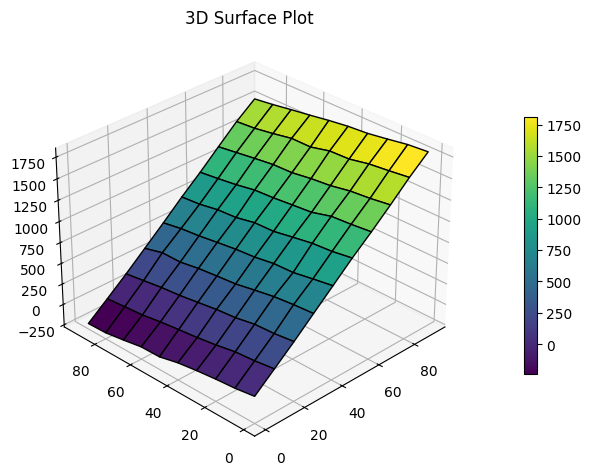

In [136]:
np.random.seed(1)

# Parameters
N = 100
a10 = 20
a20 = -3

## Generate full-fatorial design and reverse columns
XX = np.array(list(itertools.product(range(1, N + 1), repeat=2)))[::-1]

X1 = XX[:, 0]
X2 = XX[:, 1]

## define functions
f0 = lambda x1, x2: a10 * x1 + a20 * x2
f = lambda x1, x2, r: f0(x1, x2) + r

## Generate random noise
R = np.random.normal(0, 10, N*N)

# Compute Y values
Y = np.array([f(x1, x2, r) for x1, x2, r in zip(X1, X2, R)])

A, B = np.meshgrid(np.arange(1, N + 1, N / 10), np.arange(1, N + 1, N / 10))

# Plotting function
ff = lambda x1, x2: f(x1, x2, np.random.normal(0, 10))

plot3d(ff, A, B)
plt.show()

In [137]:
m1 = lambda ws, x: ws[0] * x[0] + ws[1] * x[1]
mse1 = lambda ws: mse(ws, m1, XX, Y)

In [138]:
import numpy as np

# Input and output dimensions
_in = 2
_out = 1

# Calculate the limit for the Glorot uniform initializer
_limit = np.sqrt(6 / (_in + _out))

# Initialize weights using Glorot uniform distribution
ws0 = np.random.uniform(-_limit, _limit, size=(2,))

print("Initial weights:", ws0)

Initial weights: [0.44754778 0.73534896]


In [139]:
print("Initial MSE:", f"{mse1(ws0):e}")

Initial MSE: 9.684953e+05


In [140]:
gradients1 = [
    lambda ws, x: x[0],  # First gradient function returns the first element of x
    lambda ws, x: x[1]   # Second gradient function returns the second element of x
]


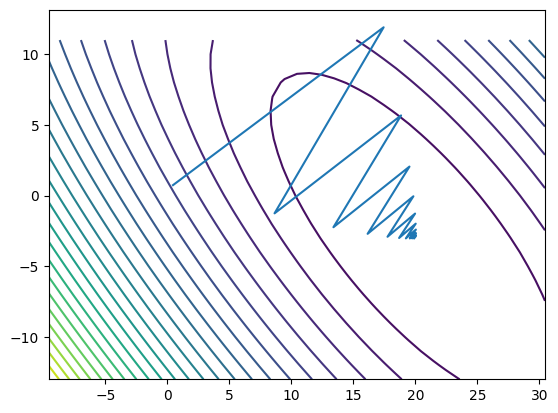

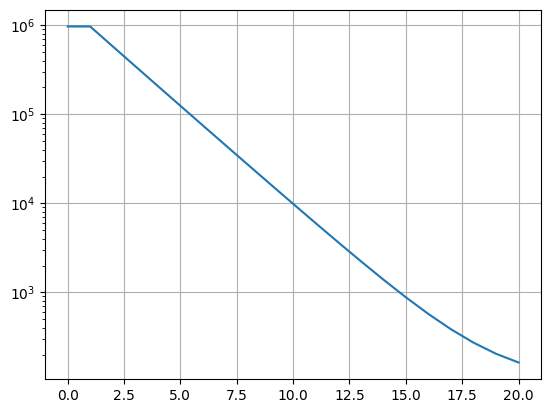

In [141]:

f = lambda a, b: mse1([a, b])

def plotCoutour(A, B, f):
    plt.figure(figsize=(10, 8))
    if not hasattr(f, 'vectorized'):
        f_vec = np.vectorize(f)
    else:
        f_vec = f
    
    # Apply function to each element in the meshgrid
    Z = f_vec(A, B)
    plt.contour(A, B, Z, levels=30)
    plt.grid(True)
    plt.show()

# Create the meshgrid
a_min = min(a10, ws0[0]) - 10
a_max = max(a10, ws0[0]) + 10
b_min = min(a20, ws0[1]) - 10
b_max = max(a20, ws0[1]) + 10
A, B = np.meshgrid(np.arange(a_min, a_max+1), np.arange(b_min, b_max+1))

Z = mse([A, B], m1, XX, Y)

# print(f"A shape: {A}")
# print(f"B shape: {B}")
# print(f"Z shape: {Z}")

grad_loss = lambda ws: grad_mse(ws, m1, gradients1, XX, Y)


# Run gradient descent
K = 20
learning_eps = 0.00015

plt.contour(A, B, Z, levels=30)

ws, history, wsHistory = grad_desc_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss,
    verbose=True
)

# Plot the contour and the gradient descent path
plt.plot(wsHistory[:, 0], wsHistory[:, 1], '-', label='Gradient Descent Path')
plt.show()

# Plot the MSE history
plt.plot(np.arange(len(history)), history, '-', label='MSE')
plt.grid(True)
plt.yscale('log')
# plt.ylim(min(history)-10, max(history)+10)
plt.show()

## Stochastic Gradient Descent(SGD)

In [142]:
def stochastic_grad_desc_mse(K, ws, learning_eps, loss_fn, grad_loss_fn, N, verbose=False):
   
    batch_size = int(N * 0.01)
    history = [loss_fn(ws)]

    wsHistory = [ws.copy()]
    for k in range(K):
       
        randices = np.random.choice(N, size=batch_size, replace=False)
    
        grad_ws = grad_loss_fn(ws, randices)
        loss = loss_fn(ws)
        old_ws = ws.copy()
        ws = old_ws - learning_eps * grad_ws
        # Store parameters at each step
        # if verbose:
        #     # Draw a line from old_ws to new ws (assumes ws has at least 2 elements)
        #     plt.plot(
        #         [old_ws[0], ws[0]],
        #         [old_ws[1], ws[1]],
        #         'ro--'
        #     )
        # print(f"Iteration {k}, MSE: {loss_fn(ws)}, Weights: {ws}")
        wsHistory.append(ws)
        history.append(loss)
    return ws, history, np.array(wsHistory)

    return ws, history

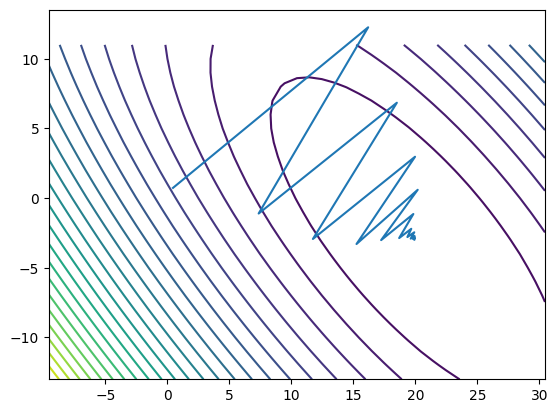

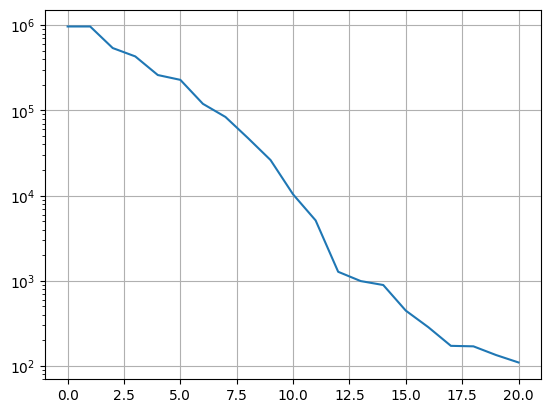

In [143]:
grad_loss2 = lambda ws, randices: grad_mse(ws, m1, gradients1, XX[randices, :], Y[randices])

mb = N*N
ws, history, wsHistory = stochastic_grad_desc_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss2,
    mb,
    verbose=True
)

plt.contour(A, B, Z, levels=30)
# Plot the contour and the gradient descent path
plt.plot(wsHistory[:, 0], wsHistory[:, 1], '-', label='Gradient Descent Path')
plt.show()

# Plot the MSE history
plt.plot(np.arange(len(history)), history, '-', label='MSE')
plt.grid(True)
plt.yscale('log')
# plt.ylim(min(history)-10, max(history)+10)
plt.show()

- In the beginning, I followed the instructions to implement the basic functions, including the MSE loss and gradient descent algorithm. After that, I experimented with Stochastic Gradient Descent (SGD).

- From the loss history plots, we can observe that Gradient Descent (GD) produces a much smoother loss curve compared to SGD.This difference is due to the inherent randomness in SGD, which updates the parameters using only one or a few data points at each step, leading to noisier updates.

- Interestingly, after 20 steps, SGD achieves a lower MSE than full-batch GD. However, this result may be due to random variation in the optimization path.

- In general, SGD tends to be faster per iteration than full-batch GD and is more scalable for large datasets, making it a more practical choice in many real-world machine learning applications.



## SGD with accumulated squared gradient: RMSProp

In [144]:
def rms_prob_mse(K, ws, learning_eps, loss_fn, grad_loss_fn, N, rho, verbose=False):
    batch_size = int (N * 0.01)
    loss_history = [loss_fn(ws)]
    wsHistory = [ws.copy()]

    r = np.zeros_like(ws)
    delta = 1e-10 * np.ones_like(ws)

    for k in range(K):
        randices = np.random.choice(N, size=batch_size, replace=False)
        grad_ws = grad_loss_fn(ws, randices)
        old_ws = ws.copy()

        r = rho * r + (1 - rho) * np.multiply(grad_ws, grad_ws)
        adaptive_lr = learning_eps / np.sqrt(r + delta)
        ws = old_ws - adaptive_lr * grad_ws

        loss = loss_fn(ws)
        loss_history.append(loss)
        wsHistory.append(ws.copy())
        if verbose:
            # Print iteration, MSE, gradients and weights
            print(f"Iteration {k}, MSE: {loss:.8f}, gradients: {grad_ws}, Weights: {ws}")
            
            # Format adaptive learning rates for better readability
            adaptive_lr_formatted = [f"{lr:.8f}" for lr in adaptive_lr]
            print(f"Adaptive learning rates: [{', '.join(adaptive_lr_formatted)}]")
            print("-----------------------------------")
            
    return ws, loss_history, np.array(wsHistory)


Iteration 0, MSE: 530309.11520960, gradients: [-112245.09516022  -76279.72392623], Weights: [3.29359767 3.58139886]
Adaptive learning rates: [0.00002536, 0.00003731]
-----------------------------------
Iteration 1, MSE: 378674.45669265, gradients: [-67564.63254293 -39021.36483375], Weights: [4.818381 4.932198]
Adaptive learning rates: [0.00002257, 0.00003462]
-----------------------------------
Iteration 2, MSE: 279674.00591837, gradients: [-74633.5722899  -29788.20441398], Weights: [6.3247346  5.94761753]
Adaptive learning rates: [0.00002018, 0.00003409]
-----------------------------------
Iteration 3, MSE: 234367.68048524, gradients: [-51073.01947422 -13842.53387365], Weights: [7.33985134 6.43757971]
Adaptive learning rates: [0.00001988, 0.00003540]
-----------------------------------
Iteration 4, MSE: 208652.97693667, gradients: [-36783.72270097  -2702.61358481], Weights: [8.08371599 6.5383511 ]
Adaptive learning rates: [0.00002022, 0.00003729]
-----------------------------------
It

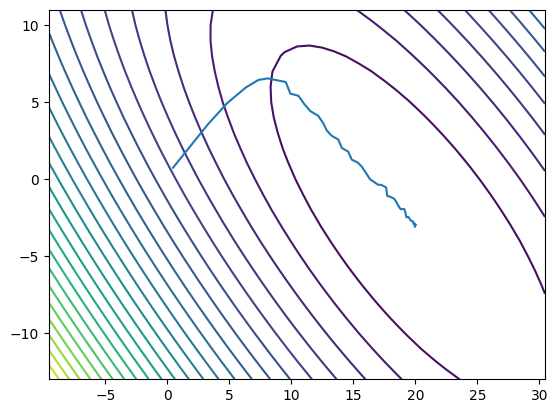

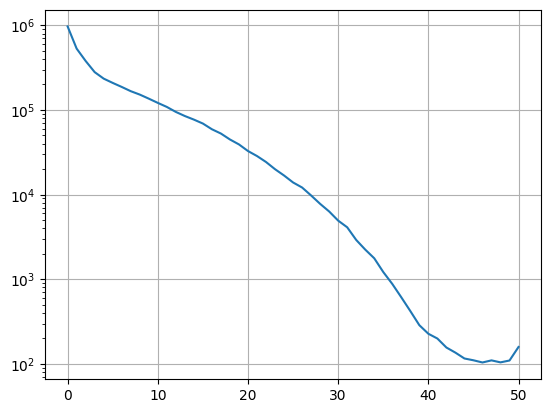

In [145]:
grad_loss2 = lambda ws, randices: grad_mse(ws, m1, gradients1, XX[randices, :], Y[randices])

mb = N*N
learning_eps = 0.9
rho = 0.9
K = 50
ws, history, wsHistory = rms_prob_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss2,
    mb,
    rho,
    verbose=True
)

plt.contour(A, B, Z, levels=30)
# Plot the contour and the gradient descent path
plt.plot(wsHistory[:, 0], wsHistory[:, 1], '-', label='Gradient Descent Path')
plt.show()

# Plot the MSE history
plt.plot(np.arange(len(history)), history, '-', label='MSE')
plt.grid(True)
plt.yscale('log')
# plt.ylim(min(history)-10, max(history)+10)
plt.show()

### Experiment Summary
* Reducing the learning rate from 1.0 to 0.9 resulted in a lower final MSE  ~104, indicating more stable and effective convergence.
* However, setting the learning rate too low (e.g., below 0.9) may leading to worse performance.
* Increasing the number of iterations (K) gives the optimizer more steps to refine the weights, allowing it to descend the loss surface further and improve the result.

## SGD with accumulated squared gradient: ADAM

In [146]:
def adam_mse(K, ws, learning_eps, loss_fn, grad_loss_fn, N, rho1, rho2, verbose=False):
    batch_size = int (N * 0.01)
    loss_history = [loss_fn(ws)]
    wsHistory = [ws.copy()]

    s = np.zeros_like(ws)
    r = np.zeros_like(ws)
    t = 0
    delta = 1e-10 * np.ones_like(ws)

    for k in range(K):
        randices = np.random.choice(N, size=batch_size, replace=False)
        grad_ws = grad_loss_fn(ws, randices)
        old_ws = ws.copy()

        t += 1
        s = rho1 * s + (1 - rho1) * grad_ws
        r = rho2 * r + (1 - rho2) * np.multiply(grad_ws, grad_ws)

        s_hat = s / (1 - rho1 ** t)
        r_hat = r / (1 - rho2 ** t)

        adaptive_lr = (learning_eps * s_hat) / (delta+np.sqrt(r_hat))
        ws = old_ws - adaptive_lr

        loss = loss_fn(ws)
        loss_history.append(loss)
        wsHistory.append(ws.copy())
        if verbose:
            # Print iteration, MSE, gradients and weights
            print(f"Iteration {k}, MSE: {loss:.8f}, gradients: {grad_ws}, Weights: {ws}")
            
            # Format adaptive learning rates for better readability
            adaptive_lr_formatted = [f"{lr:.8f}" for lr in adaptive_lr]
            print(f"Adaptive learning rates: [{', '.join(adaptive_lr_formatted)}]")
            print("-----------------------------------")
            
    return ws, loss_history, np.array(wsHistory)

Iteration 0, MSE: 809143.39811299, gradients: [-138325.62348752  -79397.91973057], Weights: [1.34754778 1.63534896]
Adaptive learning rates: [-0.90000000, -0.90000000]
-----------------------------------
Iteration 1, MSE: 672355.87999830, gradients: [-98975.20583809 -65512.28954419], Weights: [2.21913445 2.5217489 ]
Adaptive learning rates: [-0.87158667, -0.88639994]
-----------------------------------
Iteration 2, MSE: 555208.17009000, gradients: [-97072.65810772 -57400.39275301], Weights: [3.08301733 3.39253452]
Adaptive learning rates: [-0.86388287, -0.87078561]
-----------------------------------
Iteration 3, MSE: 457042.20758314, gradients: [-90225.94058799 -53405.65190262], Weights: [3.93732889 4.24989013]
Adaptive learning rates: [-0.85431157, -0.85735561]
-----------------------------------
Iteration 4, MSE: 378956.99825062, gradients: [-72494.28056949 -37500.86318836], Weights: [4.76425943 5.06346728]
Adaptive learning rates: [-0.82693053, -0.81357715]
------------------------

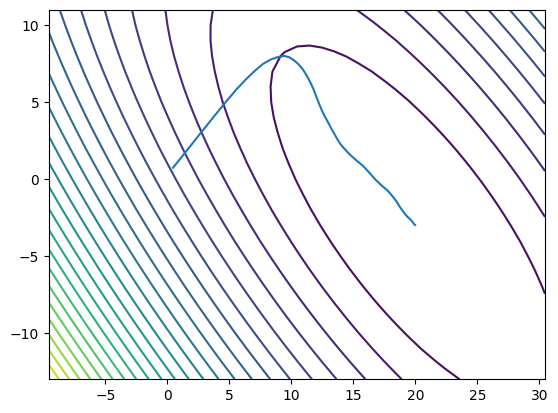

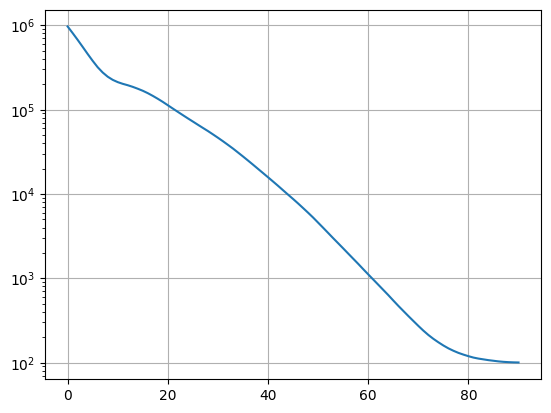

In [165]:
grad_loss2 = lambda ws, randices: grad_mse(ws, m1, gradients1, XX[randices, :], Y[randices])

mb = N*N
learning_eps = 0.9
rho1 = 0.8
rho2 = 0.999
K = 90
ws, history, wsHistory = adam_mse(
    K,
    ws0,
    learning_eps,
    mse1,
    grad_loss2,
    mb,
    rho1,
    rho2,
    verbose=True
)

plt.contour(A, B, Z, levels=30)
# Plot the contour and the gradient descent path
plt.plot(wsHistory[:, 0], wsHistory[:, 1], '-', label='Gradient Descent Path')
plt.show()

# Plot the MSE history
plt.plot(np.arange(len(history)), history, '-', label='MSE')
plt.grid(True)
plt.yscale('log')
# plt.ylim(min(history)-10, max(history)+10)
plt.show()

### Experiment Summary
* I tested various learning rates, and noticed that after about 100 iterations, the Mean Squared Error (MSE) stopped improving significantly. In many cases, the loss began to oscillate ("bounce"), indicating instability or poor convergence.

* I set the learning rate to 0.5, which reduced the bouncing behavior somewhat, but the MSE still did not decrease meaningfully — suggesting that the optimizer might be taking steps that are too large or missing the optimal descent path.

* I then adjusted rho2 (β₂) to 0.9, which controls the decay rate of the second moment estimate (squared gradients). This change made the model perform even worse, likely because reducing β₂ results in less stable variance estimates, causing noisier or more erratic updates.

* Finally, I experimented by setting rho1 (β₁) to 0.8 and the learning rate to 0.9. While this made some difference, the MSE still failed to decrease substantially.

* Across different combinations, the optimizer's behavior typically shifted around the 100th iteration, often resulting in either divergent updates (bouncing) or plateaued performance (MSE stagnating).